# **Predicción de Precios de Vehículos Usados (Core)**

### **Implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.**

### **1. Carga y Exploración de Datos:**

- Descargar y cargar el dataset.
- Realizar una exploración inicial para entender la estructura del dataset.
- Identificar valores faltantes, duplicados y outliers.

In [15]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Descargar y cargar el dataset.**

In [16]:
from google.colab import drive # Importamos la libreria para montar Google Drive

# Montar Google Drive
drive.mount('/content/drive')

#path = "/content/drive/MyDrive/Colab Notebooks/BD/vehicles.parquet"
path = "/content/drive/MyDrive/Colab Notebooks/BD/vehicles_sample.csv"
df = pd.read_csv(path)

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   url           10000 non-null  object 
 2   region        10000 non-null  object 
 3   region_url    10000 non-null  object 
 4   price         10000 non-null  int64  
 5   year          9974 non-null   float64
 6   manufacturer  9611 non-null   object 
 7   model         9888 non-null   object 
 8   condition     5958 non-null   object 
 9   cylinders     5824 non-null   object 
 10  fuel          9916 non-null   object 
 11  odometer      9896 non-null   float64
 12  title_status  9788 non-null   object 
 13  transmission  9942 non-null   object 
 14  VIN           6205 non-null   object 
 15  drive         6990 non-null

**Realizar una exploración inicial para entender la estructura del dataset.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   url           10000 non-null  object 
 2   region        10000 non-null  object 
 3   region_url    10000 non-null  object 
 4   price         10000 non-null  int64  
 5   year          9974 non-null   float64
 6   manufacturer  9611 non-null   object 
 7   model         9888 non-null   object 
 8   condition     5958 non-null   object 
 9   cylinders     5824 non-null   object 
 10  fuel          9916 non-null   object 
 11  odometer      9896 non-null   float64
 12  title_status  9788 non-null   object 
 13  transmission  9942 non-null   object 
 14  VIN           6205 non-null   object 
 15  drive         6990 non-null   object 
 16  size          2805 non-null   object 
 17  type          7884 non-null   object 
 18  paint_color   7010 non-null

In [18]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
1,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
2,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500
3,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.0,bmw,328i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.3203,-80.6250,2021-04-25T23:53:42-0400
4,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.7839,-123.0529,2021-05-01T10:04:24-0700


In [19]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [20]:
# Se eliminan las columnas que no se utilizaran
df.drop(columns="id", inplace=True)
df.drop(columns="url", inplace=True)
df.drop(columns="region_url", inplace=True)
df.drop(columns="image_url", inplace=True)
df.drop(columns="description", inplace=True)
df.drop(columns="lat", inplace=True)
df.drop(columns="long", inplace=True)
df.drop(columns="posting_date", inplace=True)
df.drop(columns="county", inplace=True)
df.drop(columns="size", inplace=True)
df.drop(columns="VIN", inplace=True)


In [21]:
df.shape

(10000, 15)

In [22]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,lakeland,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,gas,38094.0,clean,other,4wd,pickup,white,fl
1,"quad cities, IA/IL",27995,2006.0,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,manual,rwd,convertible,black,il
2,little rock,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,gas,30200.0,clean,automatic,rwd,convertible,NaN,ar
3,northern panhandle,14000,2013.0,bmw,328i,NaN,NaN,gas,92965.0,clean,automatic,NaN,NaN,NaN,oh
4,eugene,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,other,47105.0,clean,automatic,NaN,NaN,black,or


**Identificar valores faltantes, duplicados y outliers**

In [23]:
# Se validan los valores faltantes
df.isna().sum()

,0
region,0
price,0
year,26
manufacturer,389
model,112
condition,4042
cylinders,4176
fuel,84
odometer,104
title_status,212


Existen columnas que tienes muchos valores nulos... tomare la decision de borrar todas las que tengan mas de 2.000 valores nulos, pues la imputacion de estos podria causarme errores o malas predicciones

In [24]:
# se eliminan las siquientes columnas porque se identifican valores nulos
df.drop(columns="condition", inplace=True)
df.drop(columns="cylinders", inplace=True)
df.drop(columns="drive", inplace=True)
df.drop(columns="paint_color", inplace=True)


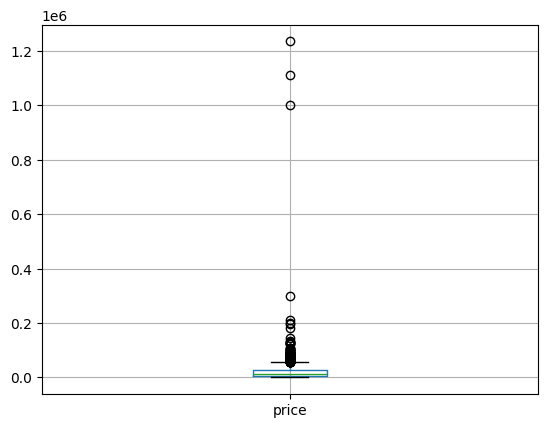

In [25]:
# se genera un gráfico botplot para ver outlier del campo price
df.boxplot(column="price")
plt.show()


Se identifican valores outlier.

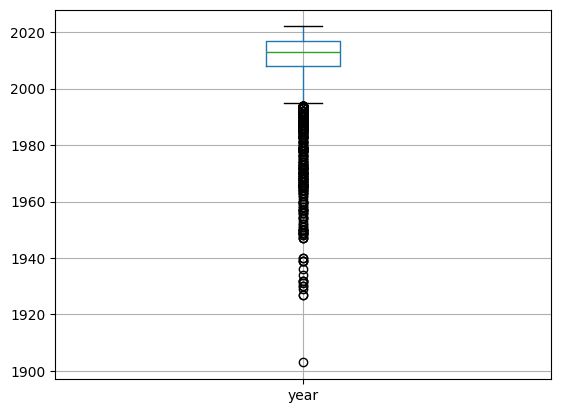

In [26]:
# Grafico un botplot para ver outlier del campo year
df.boxplot(column="year")
plt.show()

In [27]:
# reviso la estadistica de Year, por la cantidad de  valores outlier
df["year"].describe()

,year
count,9974.000000
mean,2011.349609
std,9.181263
min,1903.000000
25%,2008.000000
50%,2013.000000
75%,2017.000000
max,2022.000000


Debido a la cantidad de registros y lo lento que se torna el proceso se seguirá con el proceso para los registros cuyo año es superior 2017

In [28]:
# elimino registros de automoviles menores al año 2018
df = df[df["year"] > 2017]


In [29]:
# valido nulos nuevamente
df.isna().sum()


,0
region,0
price,0
year,0
manufacturer,35
model,10
fuel,18
odometer,12
title_status,44
transmission,13
type,261


### **2. Limpieza y Preprocesamiento:**

- Manejar valores faltantes.
- Eliminar duplicados.
- Corregir inconsistencias en los datos categóricos.
- Escalar las características numéricas.
- Realizar transformaciones necesarias para las características categóricas.

In [30]:
# miro los datos actuales
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
4,eugene,676,2019.0,chevrolet,suburban ls,other,47105.0,clean,automatic,NaN,or
18,monterey bay,35590,2018.0,gmc,sierra 1500 double cab sle,other,19458.0,clean,other,pickup,ca
25,atlanta,22990,2018.0,subaru,forester 2.5i premium,gas,43425.0,clean,other,hatchback,ga
26,cape cod / islands,15990,2018.0,volkswagen,jetta 1.4t s sedan 4d,gas,42060.0,clean,automatic,sedan,ma
30,new york city,19990,2018.0,mitsubishi,outlander sport le,gas,25641.0,clean,other,hatchback,ny


In [31]:
# Se hará reemplazo de valores NaN del campo manufacturer respecto del primer registro que encuerse encuentre en model
df["manufacturer"].fillna(df["model"].map(df.groupby("model")["manufacturer"].first()), inplace=True)


/tmp/ipython-input-31-2182080705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["manufacturer"].fillna(df["model"].map(df.groupby("model")["manufacturer"].first()), inplace=True)


In [32]:
# Se hará reemplazo de valores NaN del campo model respecto del primer registro que encuerntre en manufacturer
df["model"].fillna(df["manufacturer"].map(df.groupby("manufacturer")["model"].first()), inplace=True)


/tmp/ipython-input-32-663685274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["model"].fillna(df["manufacturer"].map(df.groupby("manufacturer")["model"].first()), inplace=True)


In [33]:
# Se hará reemplazo de valores NaN del campo fuel respecto de la moda agrupando por manufacturer y model
df["fuel"].fillna(df.groupby(["manufacturer", "model"])["fuel"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)

/tmp/ipython-input-33-2910992923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fuel"].fillna(df.groupby(["manufacturer", "model"])["fuel"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


In [34]:
# Se reemplaza odometer por el promedio, por year
df["odometer"].fillna(df.groupby("year")["odometer"].transform("mean"), inplace=True)

/tmp/ipython-input-34-2481635311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["odometer"].fillna(df.groupby("year")["odometer"].transform("mean"), inplace=True)


In [35]:
# Se reemplaza title_status por la moda
df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

/tmp/ipython-input-35-4139174853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)


In [36]:
# reemplazare transmission por la moda agrupada por manufacturer y model
df["transmission"].fillna(df.groupby(["manufacturer", "model"])["transmission"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


/tmp/ipython-input-36-1575770236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["transmission"].fillna(df.groupby(["manufacturer", "model"])["transmission"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


In [37]:
# Se reemplaza type por la moda agrupada por manufacturer y model
df["type"].fillna(df.groupby(["manufacturer", "model"])["type"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)

/tmp/ipython-input-37-601884294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["type"].fillna(df.groupby(["manufacturer", "model"])["type"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


**Eliminar duplicados.**

In [38]:
# Se validan registros duplicados
df.duplicated().sum()

np.int64(8)

In [39]:
# Se borran registros duplicados
df.drop_duplicates(inplace=True)

**Corregir inconsistencias en los datos categóricos.**

In [40]:
# Corregir inconsistencias en los datos categóricos.
df["manufacturer"].unique()

array(['chevrolet', 'gmc', 'subaru', 'volkswagen', 'mitsubishi', 'kia',
       'bmw', 'ford', 'nissan', 'ram', 'lexus', 'volvo', 'toyota',
       'rover', 'acura', 'mercedes-benz', 'chrysler', 'dodge', 'hyundai',
       'jeep', 'infiniti', 'honda', 'tesla', 'audi', 'lincoln', 'buick',
       None, 'alfa-romeo', 'mazda', 'mini', 'porsche', 'cadillac',
       'jaguar', 'fiat'], dtype=object)

No existen valores Nan pero se aprecia que aparece un valor None, por lo que seran borrado del data frame

In [41]:
# borrare registros que en el campo manufacturer siguen en Nan o tienen valor None
df.dropna(subset=["manufacturer"], inplace=True)


In [42]:
# miro los datos de manufacturer para validar que no tenga problemas
df["manufacturer"].unique()

array(['chevrolet', 'gmc', 'subaru', 'volkswagen', 'mitsubishi', 'kia',
       'bmw', 'ford', 'nissan', 'ram', 'lexus', 'volvo', 'toyota',
       'rover', 'acura', 'mercedes-benz', 'chrysler', 'dodge', 'hyundai',
       'jeep', 'infiniti', 'honda', 'tesla', 'audi', 'lincoln', 'buick',
       'alfa-romeo', 'mazda', 'mini', 'porsche', 'cadillac', 'jaguar',
       'fiat'], dtype=object)

In [43]:
# Vuelvo a validar valores nulos
df.isna().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
fuel,9
odometer,0
title_status,0
transmission,1
type,98


Como aún hay datos nulos, se actualizará por promedio y moda, segun corresponda

In [44]:
# Se actualizan los siguientes campos con el valor de la moda

df["fuel"].fillna(df["fuel"].mode()[0], inplace=True)

df["type"].fillna(df["type"].mode()[0], inplace=True)

df["transmission"].fillna(df["transmission"].mode()[0], inplace=True)

/tmp/ipython-input-44-813062124.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fuel"].fillna(df["fuel"].mode()[0], inplace=True)
/tmp/ipython-input-44-813062124.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [45]:
# Vuelvo a validar valores nulos
df.isna().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0
type,0


**Escalar las características numéricas.**

**Realizar transformaciones necesarias para las características categóricas.**

In [46]:
# Se revisa nuevamente la estructura actual para validar los tipos de datos y que ya no existan valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1914 entries, 4 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        1914 non-null   object 
 1   price         1914 non-null   int64  
 2   year          1914 non-null   float64
 3   manufacturer  1914 non-null   object 
 4   model         1914 non-null   object 
 5   fuel          1914 non-null   object 
 6   odometer      1914 non-null   float64
 7   title_status  1914 non-null   object 
 8   transmission  1914 non-null   object 
 9   type          1914 non-null   object 
 10  state         1914 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 179.4+ KB


In [47]:
# Analizo los valores de los campos
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
4,eugene,676,2019.0,chevrolet,suburban ls,other,47105.0,clean,automatic,pickup,or
18,monterey bay,35590,2018.0,gmc,sierra 1500 double cab sle,other,19458.0,clean,other,pickup,ca
25,atlanta,22990,2018.0,subaru,forester 2.5i premium,gas,43425.0,clean,other,hatchback,ga
26,cape cod / islands,15990,2018.0,volkswagen,jetta 1.4t s sedan 4d,gas,42060.0,clean,automatic,sedan,ma
30,new york city,19990,2018.0,mitsubishi,outlander sport le,gas,25641.0,clean,other,hatchback,ny


### **3. Exploración de Datos:**

- Crear visualizaciones univariadas y multivariadas.
- Calcular estadísticas descriptivas.

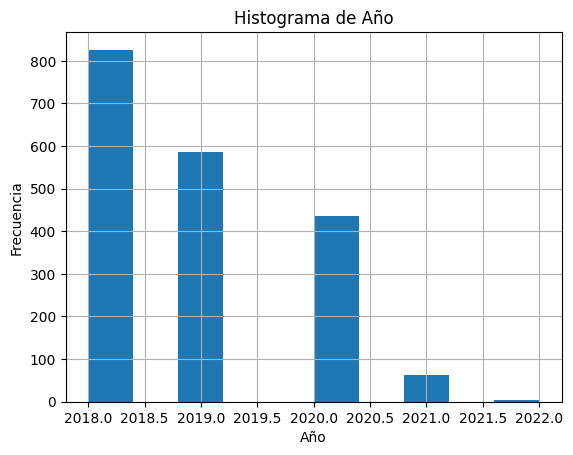

In [48]:
# Se realiza grafico histograma para la columna year
df["year"].hist()
plt.title("Histograma de Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()


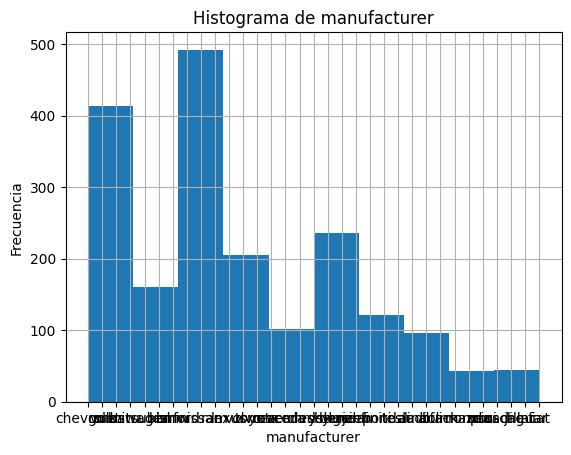

In [49]:
# grafico histograma de manufacturer
df["manufacturer"].hist()
plt.title("Histograma de manufacturer")
plt.xlabel("manufacturer")
plt.ylabel("Frecuencia")
plt.show()

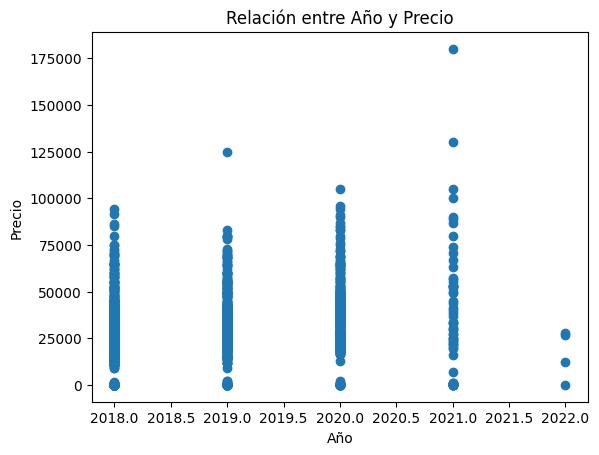

In [50]:
# grafico de correlacion entre year y price
plt.scatter(df["year"], df["price"])
plt.title("Relación entre Año y Precio")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.show()

Distribución de Precios por Año:

Para cada año (2018, 2019, 2020, 2021), hay una amplia dispersión de precios, lo que sugiere que se están analizando una variedad de artículos o servicios con costos muy diferentes.
La mayoría de los precios parecen concentrarse en el rango inferior para todos los años, pero hay valores significativamente más altos. En los años 2019, 2020 y, especialmente, 2021, se observan puntos de precio muy elevados que se consideran outliers.

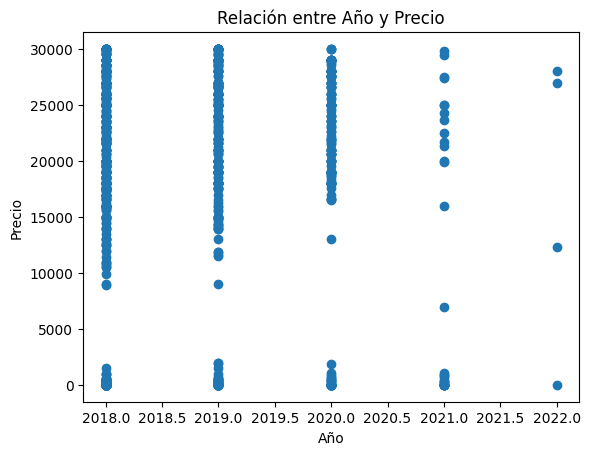

In [52]:
# grafico de correlacion entre year y price cuyo price sea menos a 30000
plt.scatter(df["year"][df["price"] < 30000], df["price"][df["price"] < 30000])
plt.title("Relación entre Año y Precio")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.show()

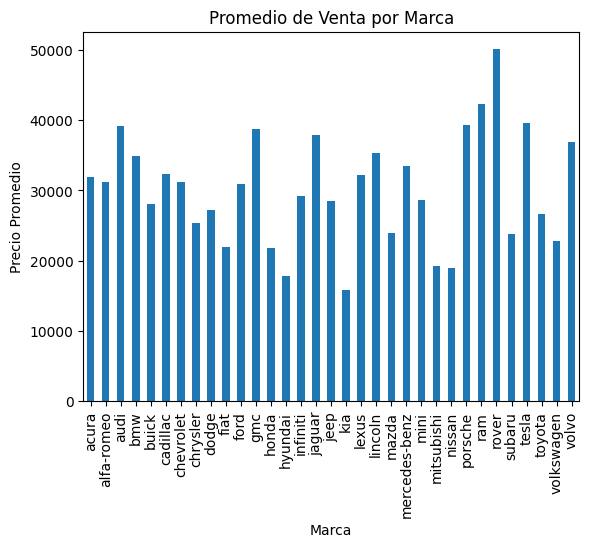

In [53]:
# Grafico de barra con el promedio de venta por manufacturer
df.groupby("manufacturer")["price"].mean().plot(kind="bar")
plt.title("Promedio de Venta por Marca")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio")
plt.show()

### **4. Modelado y Evaluación:**

- Implementar al menos dos modelos de regresión (Linear - Regression y Random Forest Regressor).
- Evaluar los modelos utilizando MSE, RMSE, y R^2.
- Seleccionar el mejor modelo basado en las métricas de evaluación.

In [54]:
# Se implementa el Train y Test
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Clasificación de las columnas
nom_cols = ["region", "manufacturer", "model", "fuel", "title_status", "transmission", "type", "state"]
num_cols = ["year", "odometer"]

In [56]:
# Definición de transformadores.
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols),
])

**Implementar al menos dos modelos de regresión (Linear - Regression y Random Forest Regressor).**

In [57]:
# Crear pipeline para Regresion Lineal.
pipeline_rl = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regresion", LinearRegression())
])

In [58]:
# Revisión del pipeline
pipeline_rl

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', LinearRegression())])

In [59]:
# Entrenamiento del modelo Regresion Lineal
pipeline_rl.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', LinearRegression())])

In [60]:
# Se genera pipeline para Ramdom Forest.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regresion", RandomForestRegressor())
])

In [61]:
# Se revisa el pipeline de Ramdom Forest
pipeline_rf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', RandomForestRegressor())])

In [62]:
# Entrenamiento del modelo Random Forest
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', RandomForestRegressor())])

**Evaluar los modelos utilizando MSE, RMSE, y R^2.**

In [63]:
# Predecir y evaluar modelo de Regresion Lineal
y_pred_rl = pipeline_rl.predict(X_test)

In [64]:
# MSE, RMSE, y R^2 de Regresion Lineal
mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)

In [66]:
# Predicción y evaluación del modelo random forest
y_pred_rf = pipeline_rf.predict(X_test)

In [67]:
# MSE, RMSE, y R^2 de Regresion Lineal
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### **5. Optimización del Modelo:**

- Optimizar el modelo seleccionado utilizando GridSearchCV.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# Optimizacion de hiperparametros para Regresion lineal
rl_params = {
    "regresion__n_jobs": [1, 2, 3, 4],
}

rl_grid = GridSearchCV(pipeline_rl, rl_params, cv=3, scoring="r2")
rl_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'type',
                                                                          'state'])])),
                                       ('regresion', LinearRegression())]),
             param_grid={'regresion__n_jobs': [1, 2, 3, 4]}, scoring='r2')

In [70]:
# Evaluación Regresion lineal
rl_best = rl_grid.best_estimator_
y_pred_rl = rl_best.predict(X_test)

# Imprimo Evaluación.
print("RL Regressor")
print("Mejores parámetros:", rl_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_rl))

RL Regressor
Mejores parámetros: {'regresion__n_jobs': 1}
R²: -0.026857488828820886


El resultado obtenido por ser < 0 es bastante deficiente, lo que se podría explicar entre otras cosas por los outliers.

In [71]:
# Optimizacion de hiperparametros para Ramdom Forest
rf_params = {
    "regresion__n_estimators": [100, 200, 300], # probamos con 100, 200 y 300.
    "regresion__max_depth": [None, 10, 20, 30], # probamos con default, 10, 20 y 30.
}

rf_grid = GridSearchCV(pipeline_rf, rf_params, cv=3, scoring="r2")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'type',
                                                                          'state'])])),
                                       ('regresion', RandomForestRegressor())]),
             param_grid={'regresion__max_depth': [None, 10, 20, 30],
                         'regresion__n_estimators': [100, 200, 300]},
             scoring='r2')

In [72]:
# Evaluación Ramdom Forest
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Imprimo Evaluación.
print("RF Regressor")
print("Mejores parámetros:", rf_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_rf))


RF Regressor
Mejores parámetros: {'regresion__max_depth': None, 'regresion__n_estimators': 200}
R²: 0.2508075780435035


### **Conclusion**

Un R² de aproximadamente 0.25 (o 25.08%) significa que el modelo Random Forest es capaz de explicar aproximadamente el 25.08% de la variabilidad de la variable objetivo (Precio) alrededor de su media. Comparación con el R² anterior (de -0.026...):

Este R² de 0.25 es significativamente mejor que el R² negativo del Regresor Lineal, e indica que el Random Forest sí tiene alguna capacidad predictiva y es capaz de capturar parte de la relación entre el año y el precio (y cualquier otra característica que se haya usado). El 25% de la variabilidad explicada es un avance positivo.


